#  Working title: Constrained optimization of the synthetic control method with application to the Economic Costs of Organized Crime (Pinotti, 2015)
###### Jessica Cremonese, Muhammad-Danial Syed, Xue Wang

*[WRITE QUICK INTRODUCTION ON WHAT THE PROJECT IS ABOUT AND WHAT YOU NEED ON YOUR PC TO RUN IT]*

## Table of contents
**Update links in the end!!**

1. [Introduction](link)<br>
2. [The Economic Costs of Organized Crime, Pinotti(2015)](link)<br>
    2.2. [Topic presentation](link)<br>
    2.3. [Tecnhiques and results of the paper by Pinotti(2015)](link)<br>
    2.4. [Something on the other replication paper?](link)<br>
3. <s> [Synthetic control methods](link)<br>
4. [Preliminary work for replication](link)<br>
    4.1. [Figures and graphs](link)<br>
    4.2. [Data preparation](link)<br>
5. [Replication of Pinotti (2015)](link)<br>
    5.1. [Optimization methods for synthetic control](link)<br>
    5.2. [Synthetic control performance analysis](link)<br>
6. [Conclusions]()
7. [References](link)<br>

## 1. Introduction

Synthetic Controls are, “arguably the most important innovation in the policy evaluation literature in the last 15 years” - Athey and Imbens, 2017.


### What are they?
- Used to evaluate the effect of an intervention in comparative case studies.
- Based on the idea that a combination of unaffected units often provides a better comparison than any single unaffected unit alone.
- This combination is captured through weights calculated by optimization algorithms. 
- Similar to Diff-in-Diff method; in fact, according to Abadie et al. (2010) the synthetic control methods generalizes the Diff-in-Diff model by allowing the effect of unobserved confounders to vary over time.
- This advantage arises from a flexible factor representation of the potential outcomes of treated units.
- Wide usage: Academia, multilateral organizations, think tanks, business analytics units, governmental agencies, and consulting firms.



In [1]:
import numpy as np
import cvxpy as cvx
import pandas as pd
import scipy.optimize
import statsmodels.api as sm
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
import statsmodels.formula.api as smf

%matplotlib inline

## 2. *The Economic Costs of Organized Crime*, Pinotti (2015)



Pinotti contributes to the literature on the growth stunting effects of organized crime with an analysis of post-war economic development of two regions in Italy, Apulia and Basilicata, which were exposed to mafia activity after the 1970s. These two regions are characterized by a peculiar situation with respect to others, such as Sicily, Campania and Calabria, which have been exposed to criminal organizations dating back to the nineteenth century. In fact, Apulia and Basilicata were characterized by levels of criminal activity and economic growth akin to those of other Southern regions unaffected by mafia activity before the spread of criminal organizations. 

Things took a turn in the 1970s, following two pivotal changes. The closure of the port of Tangier in 1960 caused a shift in the trade routes of tobacco smugglers, which suddenly involved the Adriatic regions. This change would represent a decisive factor for mafia involvement a decade later, when tobacco smuggling became the most profitable criminal business in Italy. Nowadays, tobacco smuggling has lost its podium position to large-scale nacotrafficking along the same routes. <br>
     The second most important event leading to the infiltratoin of mafia was a strong earthquake in Basilicata in 1980, which affected the entire region and the neighboring regiond of Campania and Apulia. Following the natural disaster, government relief and public investment flooded the regions, and in turn mafia appropriated as much as possible through embezzlement, intimidation and corruption of local authorities. <br>
    Besides pivotal events such as the ones detailed above, another measure helped the creation of networks and influence in the previously unaffected regions: *confino*. The initial intent of the provision was to break up links between mafiosi through the physical separation of the clans' upper echelons, however, not only did the measure fail, but in the end it also unintentionally aided the transplantation of these organizations into new territories.

### 2.1 Methodology
The two watershed events allow for a subdivision of the Italian regions into treated, control and excluded:


| Status    | Regions                                          |
| :---      | :---                                             |
| Treatment | Apulia, Basilicata                               |
| Control   | Abruzzo, Molise, Sardinia & Centre-North regions |
| Excluded  | Sicily, Campania, Calabria                       |

Excluded regions are Italian regions with a historical presence of mafia organizations, which are neither good for the control group nor as additional treatment units.

The units in the control group are weighted to build a synthetic control group which mimics the pre 1970s conditions in the treatment group and is used as a counterfactual scenario. The idea is that the weights should reflect the structural parameters that, in absence of treatment, should not have varied for the treated. Therefore, the synthetic control group should reflect how Apulia and Basilicata would have evolved in the absence of mafia introduction by replicating the initial conditions and the growth potential of the regions of interest. <br>
The weighting procedure is also a good tool to reduce potential omitted variable bias. 

#### Synthetic control method
Let $y_t$ be an outcome of interest which depends on the presence of organized crime. Each region will have outcome $y^1$ if exposed to organized crime, and $y^0$ otherwise:
$$y_t = c_t y^1_t + (1-c_t) y^0_t$$
where $c_t$ is a binary indicator for the presence of organized crime in the region. We only observe one of the two potential outcomes in a given year, but the treatment effect is $\beta_t=y^1_t-y^0_t$.

Synthetic control allows to overcome this issue. The estimator will compare the actual outcome in the treatment group to a weighted average of the units in the control group.
$$\hat{\beta}_t = y_t \sum_{i\in t}{w_t y_{it}}$$
where $w_t$ are the weights associated to each region in the control group. But how to choose the weights? A natural response is to optimize the weights with the aim of minimizing the distance between the treatment and control group before the two pivotal events happen. The optimal vector of weights $W^*(V)$ minimizes the square distance between the two groups:
$$\left(
x-\sum_{i\in I}{w_i x_i^0}
\right) '
V
\left(
x-\sum_{i\in I}{w_i x_i^0}
\right)$$
where $x$ and $x^0_i$ is the $(K\times 1)$ vector of predictors and $V$ is the $(K\times K)$ diagonal matrix with non-negative entries measuring the relative importance of each predictor. <br>
Therefore, we choose $V$, the matrix of weights, with the aim of minimizing
$$\frac{1}{T^0} \sum_{i\in T^0} \left( y_t-\sum{w^*_i y_{it}} \right) ^2 \space \text{for} \space T^0\le T$$
The mean square error is minimized in the period 1951-1960.

#### Variables
The dependent variable of interest is real GDP *per capita* at 1990 euro-equivalent prices, as a measure of economic growth. Independent variables are the main predictors of economic growth in the literature, such as initial level of GDP *per capita*, the investment rate, a human capital indicator, population density, value added share per sector.

The presence of criminal organizations can be measured with the number of cases ex Art. 416-bis of the Penal Code ("associazione a delinquere di stampo mafioso") every 100,000 inshabitants, an article specifically aimed at mafia type criminal organizations. However, using this as a measurement can be particularly problematic because of the pervasiveness of under-reporting of mafia related crimes. 
Using the number of *homicides* every 100,000 inhabitants is a much better measure for the presence of mafia organizations in Italy as emerges from the data. Murder rate data is reported in pargraph 4.1 for each group of regions (control, treatment, excluded), and highlights similar trends in the periods and regions affected by mafia organizations.

***INSERT GRAPH LATER***



## <S> 3. Synthetic control methods (WHICH WE WILL USE)

## 4. Preliminary work for replication


### 4.1 Figures and Graphs

In [1]:
# Import dataset
dtafile = 'dataset/Pinotti-replication/dataset.dta'

df = pd.read_stata(dtafile)
df1 = df[df['year'] >= 1983]

df2 = df1.groupby(['region', 'reg'])[['gdppercap', 'mafia', 'murd', 'ext', 'fire', 'kidnap', 'rob', 'smug',
            'drug', 'theft', 'orgcrime']].mean()

df2 = df2.reset_index()

NameError: name 'pd' is not defined

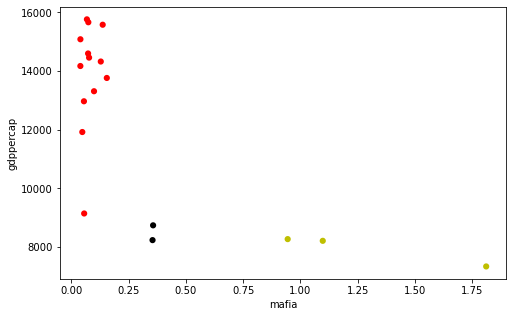

In [12]:
# Figure 1
color = np.where((df2['reg']==15) | (df2['reg']==18) | (df2['reg']==19), 'y', 
                 np.where((df2['reg']==16) | (df2['reg']==17), 'k',
                          np.where((df2['reg']<=12) | (df2['reg']==20), 'r', 'none')))

df2.plot.scatter('mafia', 'gdppercap', c=color, s=10, linewidth=3)
plt.rcParams["figure.figsize"] = (8,5)
plt.show()

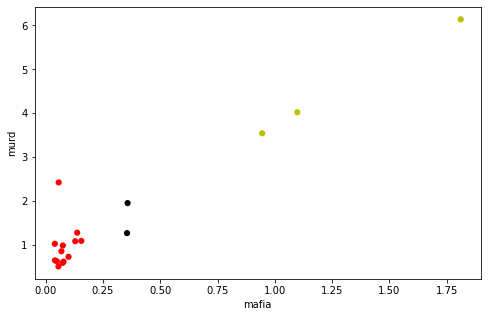

In [4]:
# Figure 3
df2.plot.scatter('mafia', 'murd', c=color, s=10, linewidth=3)
plt.rcParams["figure.figsize"] = (8,5)
plt.show()

<AxesSubplot:xlabel='year'>

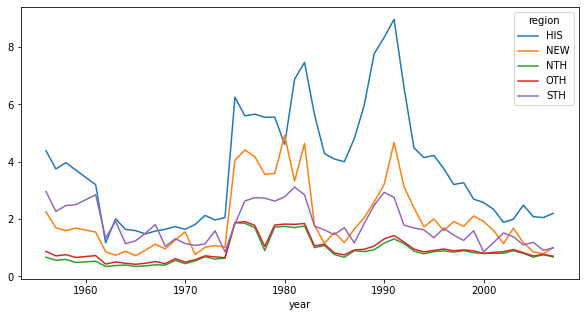

In [5]:
# Figure 4
df3 = df[df['reg'] > 20]
df3 = df3[df3['year'] >= 1956]

df3 = df3[['murd', 'year', 'region']]
df3 = df3.pivot(index='year', columns='region', values='murd')
plt.rcParams["figure.figsize"] = (10,5)
df3.plot()

### 4.2 Data Preparation

In [6]:
dtafile = 'dataset/Pinotti-replication/dataset.dta'
data = pd.read_stata(dtafile)

# Specify conditions for treated unit and control units as per Pinotti's paper (c.f. F216), 

treat_unit = data[data.reg == 21]
treat_unit = treat_unit[treat_unit.year <= 1960]                 # Matching period: 1951 to 1960
treat_unit_all = data[data.reg == 21]                            # Entire period:   1951 to 2007

control_units = data[(data.reg <= 14) | (data.reg ==20)]
control_units     = control_units[control_units.year <= 1960]
control_units_all = data[(data.reg <= 14) | (data.reg ==20)]

# Extract the outcome variable for treatment and control unit, y: GDP per capita

y_treat     = np.array(treat_unit.gdppercap).reshape(1, 10)              # Matching period 
y_treat_all = np.array(treat_unit_all.gdppercap).reshape(1, 57)          # Entire period

y_control     = np.array(control_units.gdppercap).reshape(15, 10)
y_control_all = np.array(control_units_all.gdppercap).reshape(15, 57)

#### Data Organization into Appropriate Format 

In [7]:
## Prepare matrices with only the relevant variables into CVXPY format, predictors k = 8

# k x 1 vector: mean values of k predictors for 1 treated unit

X1 = treat_unit[['gdppercap', 'invrate', 'shvain', 'shvaag', 'shvams', 'shvanms', 'shskill', 'density']]
X1 = X1.set_index(np.arange(len(X1)) // 10).mean(level=0)
X1 = X1.values               

# k x J matrix: mean values of k predictors for J untreated units

X0 = control_units[['gdppercap', 'invrate', 'shvain', 'shvaag', 'shvams', 'shvanms', 'shskill', 'density']]
X0 = X0.set_index(np.arange(len(X0)) // 10).mean(level=0)
X0 = X0.values

## 5. Replication of Pinotti (2015)

### 5.1 Optimization methods for syntetic control <s> with CVXPYY

$$
\hat{\boldsymbol{W}}=\operatorname{argmin}_{\boldsymbol{W}}\left[\sum_{m=1}^{k}\left(x_{m1}-\sum_{j=2}^{J+1}\boldsymbol{w}_{j} \boldsymbol{x}_{mj}\right)^{2}\right]
$$

subject to
                                                      
$$ \sum_{j=2}^{J+1}\boldsymbol{w}_{j}=1$$   

where w are the 15 weights, one for each of the control regions 'donor pool'.

Which combination of weights best resembles the pre-intervention predictors values for the treated unit?



In [8]:
# Setup the objective for CVXPY function
w = cvx.Variable((1, 15), nonneg=True)

objective_function = cvx.Minimize(cvx.sum_squares(X1 - w @ X0))
objective_constraints = [cvx.sum(w) == 1]
objective_solution = cvx.Problem(objective_function, objective_constraints).solve(verbose=False) #set True for details

In [13]:
# CVXPY Solution
print('\nObjective Value: ',objective_solution,'\n\nOptimal Weights: ',w.value)
sol_frame = pd.DataFrame({'Region':control_units.region.unique(), 
                           'Weights': np.round(w.value[0], decimals=3)})
display(sol_frame)


Objective Value:  833.2880036755997 

Optimal Weights:  [[0.         0.         0.         0.         0.15165999 0.
  0.         0.         0.         0.         0.         0.
  0.         0.84834001 0.        ]]


,Region,Weights
0,PIE,0.000
1,VDA,0.000
2,LOM,0.000
3,TAA,0.000
4,VEN,0.152
5,FVG,0.000
6,LIG,0.000
7,EMR,0.000
8,TOS,0.000
9,UMB,0.000


#### Commentary:
- The basic CVXPY minimization problem allocates weights to VEN (Veneto: 0.152) and MOL (Molise: 0.848). 
- In comparison the weights in the paper are to ABR (Abruzzo: 0.624) and MOL (0.376).
- Becker and Klößner found the weights to ABR (43.035), MOL 48.934, and Sardinia (SDR: 8.03045). 

But what do these weights mean in terms of the actual performance of our synthetic controls?

### 5.2 Synthetic Control Performance Analysis

#### Table Comparison

In [20]:
# Dataframe to show predicted vs actual values of variables, and the RMSPE of optimizer and Pinotti weights.
w_paper = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.624, 0.376, 0]).reshape(1, 15)

x_pred_paper = (w_paper[0] @ X0)
x_pred_opt = (w.value[0] @ X0)

pred_error_paper = x_pred_paper - X1[0]
pred_error_opt = x_pred_opt - X1[0]

y_pred_paper = (w_paper[0] @ y_control)
y_pred_opt = w.value[0] @ y_control

data_compare = pd.DataFrame({'Actual':X1[0],
                             'Paper':x_pred_paper,
                             'Optimizer':x_pred_opt,
                             'Paper Differential': pred_error_paper,
                             'Optimizer Differential': pred_error_opt},
                              index= data.columns[[3,16,11,12,13,14,26,28]]
)

print('RMSPE CVXPY: {} \nRMSPE Paper: {}'\
      .format(np.sqrt(np.mean((y_pred_opt - y_treat)**2)), 
             np.sqrt(np.mean((y_pred_paper - y_treat)**2))))

print ('\nBreakdown across predictors:')
data_compare

RMSPE CVXPY: 154.26663518337438 
RMSPE Paper: 130.14101997364745

Breakdown across predictors:


,Actual,Paper,Optimizer,Paper Differential,Optimizer Differential
gdppercap,2394.995605,2402.903783,2398.078601,7.908178,3.082995
invrate,0.316296,0.232005,0.212794,-0.084291,-0.103502
shvain,0.215479,0.221464,0.228207,0.005985,0.012728
shvaag,0.151702,0.154425,0.167108,0.002723,0.015406
shvams,0.401665,0.391364,0.383643,-0.010302,-0.018023
shvanms,0.231154,0.232748,0.221043,0.001594,-0.010111
shskill,0.165486,0.180807,0.159343,0.015321,-0.006143
density,134.778870,105.627378,106.077449,-29.151492,-28.701421


#### Graphical Comparison

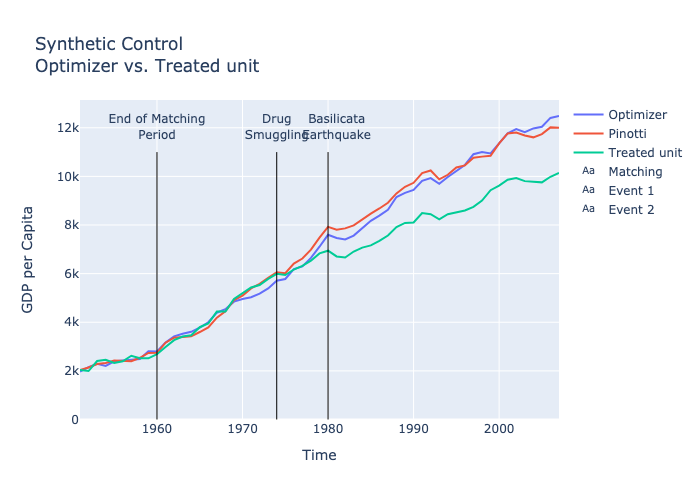

In [26]:
y_synth_paper = (w_paper[0] @ y_control_all)
y_synth_opt = w.value[0] @ y_control_all

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_synth_opt,
                    mode='lines', name='Optimizer'))
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_synth_paper,
                    mode='lines', name='Pinotti'))
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_treat_all[0],
                    mode='lines', name='Treated unit'))

fig.add_shape(dict(type="line", x0=1960, y0=0, x1=1960, y1=11000,
                   line=dict(color="Black", width=1)))

fig.add_shape(dict(type="line", x0=1974, y0=0, x1=1974, y1=11000,
                   line=dict(color="Black", width=1)))

fig.add_shape(dict(type="line", x0=1980, y0=0, x1=1980, y1=11000,
                   line=dict(color="Black", width=1)))

fig.add_trace(go.Scatter(x=[1960], y=[12000], mode="text",
    name="Matching", text=["End of Matching<br>Period"]))

fig.add_trace(go.Scatter(x=[1974], y=[12000], mode="text",
    name="Event 1", text=["Drug<br>Smuggling"]))

fig.add_trace(go.Scatter(x=[1981], y=[12000], mode="text",
    name="Event 2", text=["Basilicata<br>Earthquake"]))

fig.update_layout(title='Synthetic Control<br>Optimizer vs. Treated unit',
                   xaxis_title='Time', yaxis_title='GDP per Capita')

# Dynamic graph
fig.show()

# Static graph only for display on github
fig.show(renderer="png")

Our obtained weights $$w$$ can not be optimal since there exists weights $$w^{*}$$ such that $$RMSPE(w) > RMSPE(w^{*})$$

Clearly, there is room for improvement in the optimization algorithm. We proceed by augmenting the objective function with the relative importance of each of the k predictors

### Optimization with addition of relative importance of each of the k predictors

In [22]:
n = 100000      # Number of iterations
iteration = []

for i in range(n):
    
    v_coeff = np.random.dirichlet(np.ones(8), size=1)
    W = cvx.Variable((1, 15), nonneg=True)
    
    objective_function    = cvx.Minimize(cvx.sum(cvx.multiply(v_coeff, cvx.square(X1 - W @ X0))))
    objective_constraints = [cvx.sum(W) == 1]
    objective_solution    = cvx.Problem(objective_function, objective_constraints).solve(verbose=False)
    
    prediction_error =  np.sqrt(np.mean(((W.value @ y_control) - y_treat)**2))    
    iteration.append([prediction_error, v_coeff, W.value])


In [23]:
soln_frame_v = pd.DataFrame(iteration)
soln_frame_v.columns =['Error', 'Relative Importance', 'Weights']

soln_frame_v = soln_frame_v.sort_values(by='Error', ascending=True)
#soln_frame_v.head(10)

In [24]:
W = soln_frame_v.iloc[0][2][0]
V = soln_frame_v.iloc[0][1][0]

best_weights_region = pd.DataFrame({'Region':control_units.region.unique(), 
                                    'W(V*)': np.round(W, decimals=3)})

best_weights_importance = pd.DataFrame({'Predictors': data.columns[[3,16,11,12,13,14,26,28]],
                                        'V*': np.round(V, 3)})

display(best_weights_importance)
display(best_weights_region)

,Predictors,V*
0,gdppercap,0.005
1,invrate,0.228
2,shvain,0.054
3,shvaag,0.005
4,shvams,0.059
5,shvanms,0.124
6,shskill,0.525
7,density,0.000


,Region,W(V*)
0,PIE,0.000
1,VDA,0.000
2,LOM,0.000
3,TAA,0.000
4,VEN,0.000
5,FVG,0.000
6,LIG,0.000
7,EMR,0.000
8,TOS,0.000
9,UMB,0.000


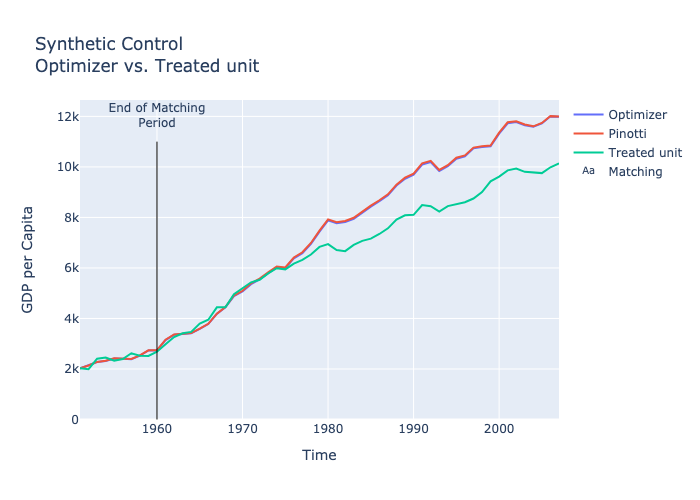

RMSPE CVXPY with V*: 130.41671658325862 
RMSPE Paper: 130.14101997364745


In [27]:
y_synth_opt_V = W @ y_control_all
y_pred_opt_V = W @ y_control


fig = go.Figure()
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_synth_opt_V,
                    mode='lines', name='Optimizer'))
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_synth_paper,
                    mode='lines', name='Pinotti'))
fig.add_trace(go.Scatter(x=list(data.year.unique()), y=y_treat_all[0],
                    mode='lines', name='Treated unit'))
fig.add_shape(dict(type="line", x0=1960, y0=0, x1=1960, y1=11000,
                   line=dict(color="Black", width=1)))

fig.add_trace(go.Scatter(x=[1960], y=[12000], mode="text",
    name="Matching", text=["End of Matching<br>Period"]))

fig.update_layout(title='Synthetic Control<br>Optimizer vs. Treated unit',
                   xaxis_title='Time', yaxis_title='GDP per Capita')
fig.show()

# Static graph only for display on github
fig.show(renderer="png")

print('RMSPE CVXPY with V*: {} \nRMSPE Paper: {}'\
      .format(np.sqrt(np.mean((y_pred_opt_V - y_treat)**2)), 
             np.sqrt(np.mean((y_pred_paper - y_treat)**2))))

#### Scipy Implementation (draft)

## 6. Conclusions

## N. References
- Pinotti, Paolo. "The economic consequences of organized crime: Evidence from Southern Italy." Bank of Italy (2011).
- Becker, Martin, and Stefan Klößner. "Estimating the economic costs of organized crime by synthetic control methods." Journal of Applied Econometrics 32.7 (2017): 1367-1369.
- Blackburn, Keith, Kyriakos C. Neanidis, and Maria Paola Rana. "A theory of organized crime, corruption and economic growth." Economic Theory Bulletin 5.2 (2017): 227-245.
- Garoupa, Nuno. "The economics of organized crime and optimal law enforcement." Economic Inquiry 38.2 (2000): 278-288.